# Imorting Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

# Training Data

In [2]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "dataset1/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )

Found 28273 images belonging to 6 classes.


# Testing Data

In [3]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "dataset1/test", 
                                           target_size=(224,224), 
                                           batch_size=32)
val_data.class_indices

Found 7067 images belonging to 6 classes.


{'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

# Visualize images in Training dataset

In [4]:
t_img , label = train_data.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

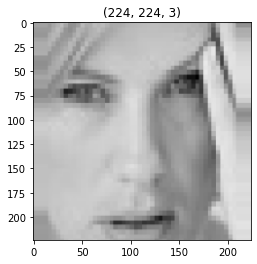

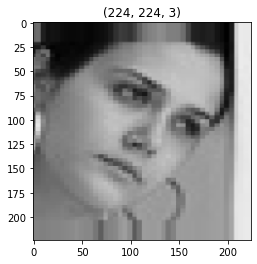

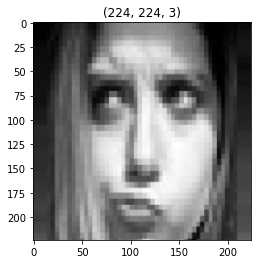

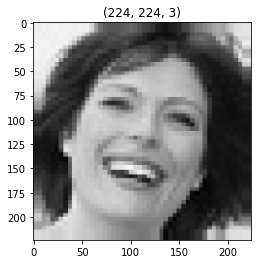

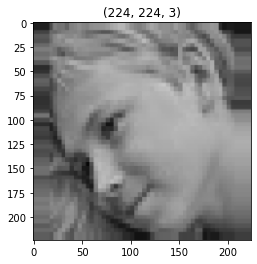

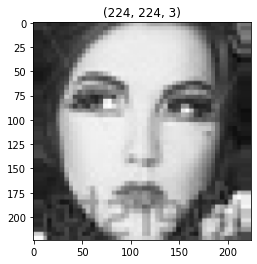

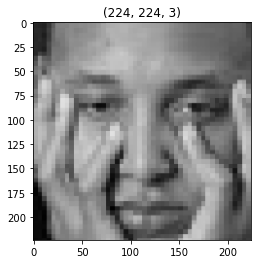

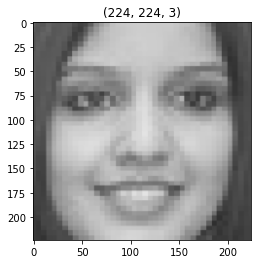

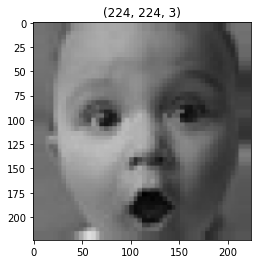

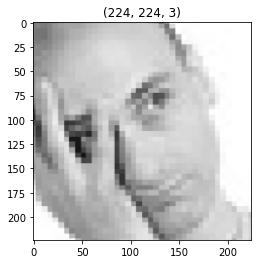

In [5]:
plotImages(t_img, label)


# using MobileNet for its pretrained weights

In [6]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=6 , activation='softmax' )(x)

# Creating Model

In [7]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Training the model

In [9]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 100, 
                           validation_data= val_data, 
                           validation_steps= 10)

C:\Users\Anushka\AppData\Local\Temp\ipykernel_2724\1346425886.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/100
10/10 [==============================] - 12s 1s/step - loss: 7.4350 - accuracy: 0.3812 - val_loss: 5.4512 - val_accuracy: 0.3938
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 6.6658 - accuracy: 0.3812 - val_loss: 5.6609 - val_accuracy: 0.4187
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 5.5673 - accuracy: 0.4406 - val_loss: 6.8226 - val_accuracy: 0.4187
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 6.6714 - accuracy: 0.3656 - val_loss: 6.1146 - val_accuracy: 0.3938
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 5.6836 - accuracy: 0.4437 - val_loss: 4.7609 - val_accuracy: 0.4531
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 5.9765 - accuracy: 0.4062 - val_loss: 6.1324 - val_accuracy: 0.4187
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: 4.3432 - accuracy: 0.4531 - val_loss: 3.6948 - val_accuracy: 0.5281
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 15s 2s/step - loss: 7.5311 - accuracy: 0.4844 - val_loss: 7.8972 - val_accuracy: 0.4812
Epoch 60/100
10/10 [==============================] - 15s 2s/step - loss: 8.2927 - accuracy: 0.4625 - val_loss: 7.6570 - val_accuracy: 0.4750
Epoch 61/100
10/10 [==============================] - 15s 2s/step - loss: 6.0131 - accuracy: 0.5562 - val_loss: 7.4355 - val_accuracy: 0.4812
Epoch 62/100
10/10 [==============================] - 15s 2s/step - loss: 6.6401 - accuracy: 0.5063 - val_loss: 6.9383 - val_accuracy: 0.5125
Epoch 63/100
10/10 [==============================] - 15s 2s/step - loss: 5.9482 - accuracy: 0.5250 - val_loss: 6.3782 - val_accuracy: 0.4625
Epoch 64/100
10/10 [==============================] - 16s 2s/step - loss: 6.0981 - accuracy: 0.4938 - val_loss: 8.9724 - val_accuracy: 0.4094
Epoch 65/100
10/10 [==============================] - 16s 2s/step - loss: 5.0382 - accuracy: 0.5531 - val_loss: 7.4641 - val_accuracy: 0.4906
Epoch 

# Saving the built model

In [10]:
model.save('final_model1.h5')

# Training accuracy vs testing accuracy

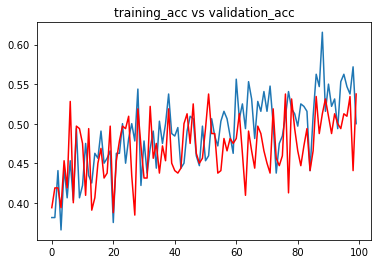

In [11]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

# Training loss vs testing loss

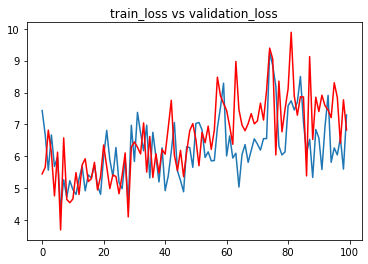

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

# Testing Model using Images

In [13]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 338ms/step
 the image is of angry


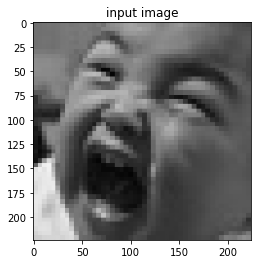

In [14]:
path = "dataset1/test/fear/PrivateTest_134207.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()